<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_4_2/blob/main/0207%20Day8/12_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 회귀(Regression) 예측**

* 수치형 값을 예측(Y의 값이 연속된 수치로 표현)
* 예) 주택 가격 예측, 매출액 예측
* [도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)


In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) # e 표현을 일반 숫자로 변경

In [2]:
from sklearn.datasets import load_boston

In [3]:
# 데이터 로드
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# 요약정보
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# data['data']에는 x 데이터, data['feature_name']에는 컬럼명
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [6]:
# y 데이터 price를 데이터프레임에 추가
df['MEDV'] = data['target']
# 데이터 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **컬럼**
속성수 : 13
* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [10]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
346,0.06162,0.0,4.39,0.0,0.442,5.898,52.3,8.0136,3.0,352.0,18.8,364.61,12.67
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97


In [11]:
y_train.head()

47     16.6
351    24.1
468    19.1
346    17.2
399     6.3
Name: MEDV, dtype: float64

# **2. 평가 지표**

### **2-1. MSE(Mean Squared Error)**

* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값


### **2-2. MAE(Mean Absolute Error)**

* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

* 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값

### **2-3. RMSE(Root Mean Squared Error)**

* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 뒤 루트를 씌운 값

In [12]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [13]:
def my_mse(pred, actual):  # 4.0
  return ((pred - actual)**2).mean()

In [14]:
my_mse(pred, actual)

4.0

In [15]:
def my_mae(pred, actual):  # 2.0
  return np.abs(pred - actual).mean()

In [16]:
my_mae(pred, actual)

2.0

In [17]:
def my_rmse(pred, actual):  # 2.0
  return np.sqrt(my_mse(pred, actual))

In [18]:
my_rmse(pred, actual)

2.0

### **2-4. sklearn의 평가지표 활용**

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [21]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

# **3. 모델별 성능 확인을 위한 함수**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# **4. Linear Regression**

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(n_jobs=-1)

In [25]:
model.fit(x_train, y_train)
# 기본값 : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

LinearRegression(n_jobs=-1)

In [27]:
pred = model.predict(x_test)

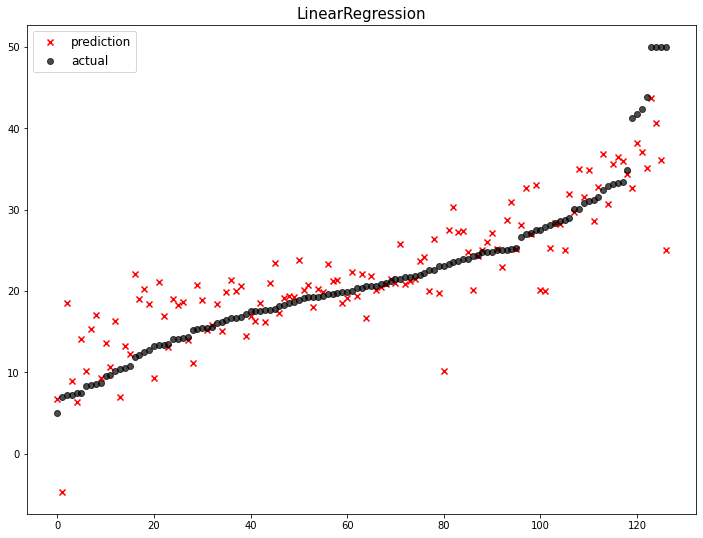

              model        mse
0  LinearRegression  23.635948


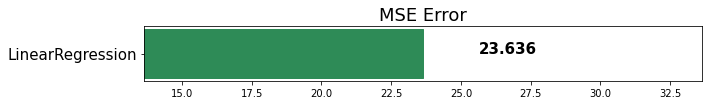

In [28]:
mse_eval('LinearRegression', pred, y_test)